In [8]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import ta
import numpy as np

In [9]:
SYMBOL = 'ETH'
from_csv = pd.read_csv(f'../../data/{SYMBOL}.csv')
df = from_csv.set_index(pd.DatetimeIndex(from_csv['begins_at'].values))
df = df.rename(columns={"begins_at":"time", "open_price":"open", "close_price":"close", "low_price":"low", "high_price":"high"})
df['average'] = df[['high','low']].mean(axis=1)
df = df.drop(columns=["time"])

In [10]:

def scale1ToPrice(price, to_scale):
    return (to_scale / (to_scale.max() - to_scale.min())) * (price.max() - price.min()) + price.min()


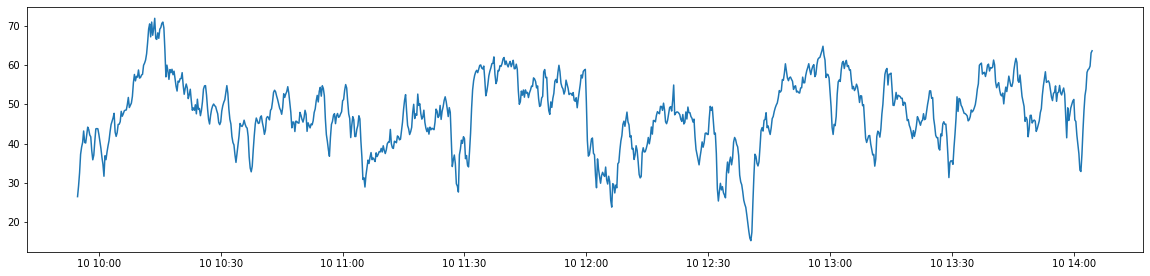

In [11]:
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
# df['kama'] = ta.momentum.KAMAIndicator(df.average, window = 28).kama()
df['rsi'] = ta.momentum.RSIIndicator(df.average, window= 28).rsi()
# plt.plot(df.average.tail(1000))
plt.plot(df.rsi.tail(1000))


In [12]:
# plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
# plt.plot(df.average.tail(400), label="Price")
# plt.plot(scale1ToPrice(df.average.tail(400), df.rsi.tail(400)), label="RSI")
# plt.legend(loc='lower right')
# plt.plot()

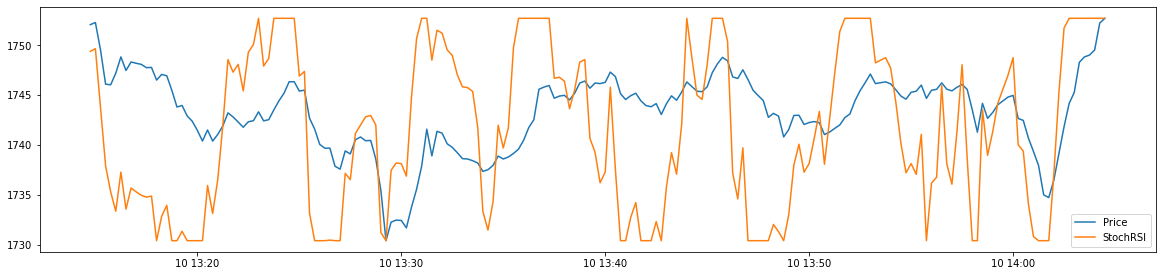

In [13]:
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.average.tail(200), label="Price")
plt.plot(scale1ToPrice(df.average.tail(200), ta.momentum.StochRSIIndicator(df.average).stochrsi().tail(200)), label="StochRSI")
plt.legend(loc='lower right')
plt.show()

In [14]:
class Strategy:
    def __init__(self):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-14-4ba4433b4ae1>, line 3)

### Strategies

In [388]:
# def calculate_indicators(dataframe):
#     # Stoch
#     stoch = ta.momentum.StochasticOscillator(dataframe.high, dataframe.low, dataframe.close).stoch()
#     dataframe['slowk'] = stoch

#     # RSI
#     dataframe['rsi'] = ta.momentum.rsi(dataframe.close)

#     # Inverse Fisher transform on RSI, values [-1.0, 1.0] (https://goo.gl/2JGGoy)
#     rsi = 0.1 * (dataframe['rsi'] - 50)
#     dataframe['fisher_rsi'] = (np.exp(2 * rsi) - 1) / (np.exp(2 * rsi) + 1)

#     # Bollinger bands
#     bollinger = ta.volatility.BollingerBands(dataframe.close)
#     dataframe['bb_lowerband'] = bollinger.bollinger_lband()

#     # SAR Parabol
#     dataframe['sar'] = ta.trend.PSARIndicator(dataframe.high, dataframe.low, dataframe.close).psar()

#     return dataframe

In [389]:
# def buy_strat_1(dataframe, i):
#     row = dataframe.iloc[i]
#     if (row['rsi'] < 30) and (row['slowk'] < 20) and (row['bb_lowerband'] > row['close']):
#         return True
#     else:
#         return False

In [390]:
# def sell_strat_1(dataframe, i, bought_at_index):
#     row = dataframe.iloc[i]
#     if (row['sar'] > row['close']) and (row['fisher_rsi'] > 0.3):
#         return True
#     else:
#         return False

In [401]:
from ..strategies.strategy002 import Strategy002

ImportError: attempted relative import with no known parent package

### Analysis Helper functions

In [391]:
#Create a function to signal when to buy and sell an asset
def calculate_when_to_trade(dataframe, buy_function, sell_function):
    dataframe = calculate_indicators(dataframe)
    sigPriceBuy = []
    sigPriceSell = []
    cycles = []
    bought = False
    for i in range(0,len(dataframe)):
        current_price = dataframe['average'][i]
        if bought == False and buy_function(dataframe, i):
            sigPriceBuy.append(current_price)
            sigPriceSell.append(np.nan)
            bought = i
        elif bought != False and sell_function(dataframe, i, bought): 
            sigPriceSell.append(current_price)
            sigPriceBuy.append(np.nan)
            cycles.append(current_price - dataframe['average'][bought])
            bought = False
        else: #Handling nan values
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell, cycles)

In [392]:
def plot(df, sigPriceBuy, sigPriceSell):
    plt.figure(figsize=(20,4.5))
    plt.xticks(rotation=45)
    plt.plot( df['average'],  label='price', linewidth=1)
    plt.scatter(df.index, sigPriceBuy, color = 'green', label='Buy Signal', marker = '^', alpha = 1)
    plt.scatter(df.index, sigPriceSell, color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

### Plot when to Trade

Executed buy and sell strategies:
Number of cycles: 11
Total: $49.50
Avg profit/cycle: $4.50


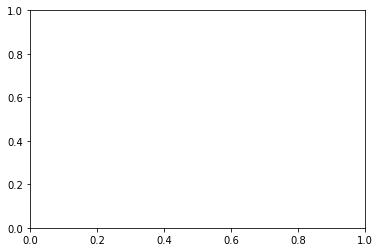

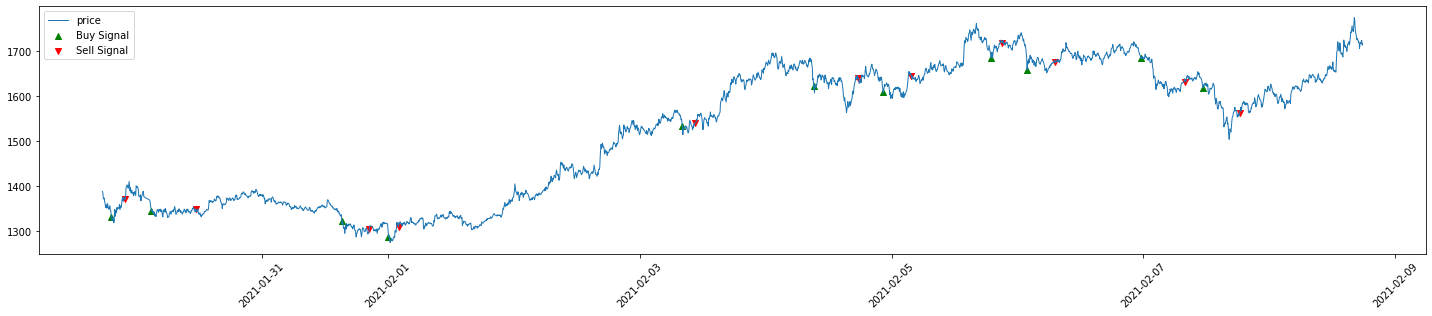

In [393]:
sigPriceBuy, sigPriceSell, cycles = calculate_when_to_trade(df, buy_strat_1, sell_strat_1)

print("Executed buy and sell strategies:")
print(f"Number of cycles: {len(cycles)}")
print(f"Total: ${sum(cycles):.2f}")
if len(cycles):
    print(f"Avg profit/cycle: ${sum(cycles)/len(cycles):.2f}")

plt.box(cycles)
plt.show()
plot(df, sigPriceBuy, sigPriceSell)